In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import random
import math

In [31]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

def plot_solution(solution, df):
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [32]:
def triangle_swap(solution):
    i1, i2, i3 = random.sample(range(0, len(solution)-1), 3)
    new_solution = solution
    new_solution[i1], new_solution[i2], new_solution[i3] = new_solution[i2], new_solution[i3], new_solution[i1]
    return new_solution

def sim_anneal(solution, df, K, stopK, alpha, ittol):
    assert alpha < 1, "choose a smaller alpha"
    all_dist = []
    i = 0
    while K > stopK and i < ittol:
        # elementary edit, triangle swap for now
        new_solution = triangle_swap(solution)
        
        # decide whether to accept the new solution
        if total_distance(new_solution, df) < total_distance(solution, df):
            solution = new_solution
        else:
            # accept with probability depending on temperature
            if np.random.random() < math.exp(abs(total_distance(new_solution, df)- total_distance(solution, df))/K):
                solution = new_solution
        # decrease temperature
        all_dist.append(total_distance(solution, df))
        K *= alpha
        i += 1
        
    if len(set(solution)) != len(solution):
        raise ValueError
    return solution, all_dist
    

In [53]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

<AxesSubplot:xlabel='x', ylabel='y'>

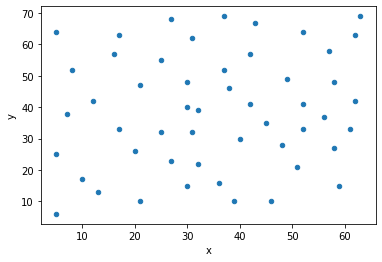

In [54]:
df.plot.scatter("x", "y")

In [55]:
df = df[0:10]
# tidy data
df = df.sort_values("x")

In [56]:
# find naive solution along 1 dimension
solution = []
for row in range(df.shape[0]):
    solution.append(df.iloc[row].name)

In [57]:
total_distance(solution, df)

279.24296426489747

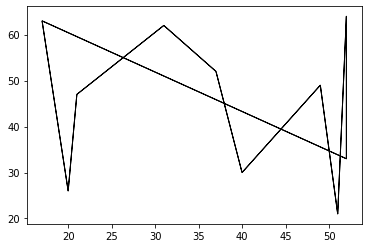

In [58]:
plot_solution(solution, df)

In [59]:
solution

['7', '4', '6', '8', '1', '5', '2', '10', '3', '9']

In [60]:
# brute force, very bad
i = 0
while True:
    random.shuffle(solution)
    if total_distance(solution, df) < 1200 or i > 1000:
        break
    i += 1

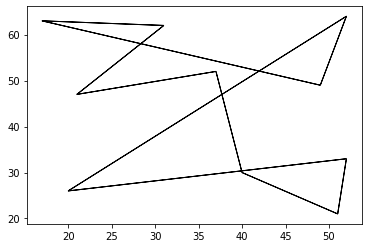

In [61]:
plot_solution(solution, df)

In [62]:
solution

['9', '4', '3', '2', '7', '8', '6', '1', '5', '10']

In [63]:
total_distance(solution, df)

229.94555316843667

In [69]:
sol, all_dist = sim_anneal(solution, df, 0.000000001, 0.000000001, 0.99, 100000)

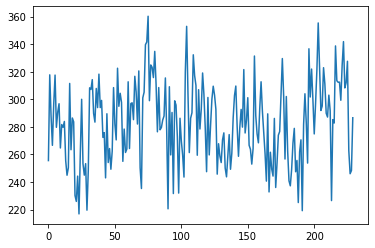

In [68]:
plt.plot(all_dist)

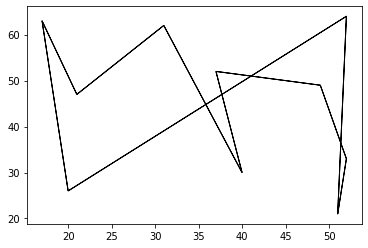

In [66]:
plot_solution(sol, df)

51